In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
energies = {}
methods = ["binary", "ohe", "unary", "domain_wall"]

for method in methods:

    # iterate over different size
    for filename in os.listdir(f"{method}/"):
        if filename.startswith("solutions_"):

            # load the data
            data = np.load(f"{method}/{filename}", allow_pickle=True)
            
            # iterate over each trial which has different penalty weights
            for trial in data:


                # extract the penalty weights
                weights = tuple(trial["penalty_weights"].values())
                

                # extract the solutions
                solutions = trial["solutions"]

                energy_array = []

                for sample in solutions:
                    # extract the energy
                    energy = sample["energy"]

                    # store the energy
                    energy_array.append(energy)

                if method in list(energies.keys()):
                    if filename in list(energies[method].keys()):
                        # if the filename already exists, append the energy array
                        energies[method][filename].setdefault(weights, energy_array)
                    else:
                        # if the filename does not exist, create a new entry
                        energies[method].setdefault(filename, {weights: energy_array})
                else:
                    energies.setdefault(method, {filename: {weights: energy_array}})
                    

## Select the top 10 best performing penalty weight combos

In [4]:
# select 10 best penalty pairings
energies_sorted = {}

for method in list(energies.keys()):
    for filename in list(energies[method].keys()):
        
        # sort the energy values by the minimum energy produced
        energies_new = sorted(energies[method][filename], key=lambda x: np.mean(energies[method][filename][x]))[:10]
        print(energies_new)

        # add the found penalty pairings to the sorted dictionary
        for i in energies_new:
            if method in list(energies_sorted.keys()):
                if filename in list(energies_sorted[method].keys()):
                    # if the filename already exists, append the energy array
                    energies_sorted[method][filename].setdefault(i, energies[method][filename][i])
                else:
                    # if the filename does not exist, create a new entry
                    energies_sorted[method].setdefault(filename, {i: energies[method][filename][i]})
            else:
                # if the filename does not exist, create a new entry
                energies_sorted.setdefault(method, {filename: {i: energies[method][filename][i]}})

[(1, 1, 1), (1, 2, 1), (1, 2, 2), (1, 1, 2), (1, 3, 3), (1, 1, 3), (1, 2, 3), (1, 1, 4), (1, 4, 3), (1, 3, 2)]
[(1, 1, 1), (1, 1, 2), (1, 2, 4), (1, 3, 4), (1, 1, 4), (1, 2, 1), (1, 2, 3), (1, 3, 3), (1, 4, 4), (1, 1, 3)]
[(1, 1, 1), (1, 2, 4), (1, 1, 2), (1, 2, 1), (1, 2, 3), (1, 3, 4), (1, 2, 2), (1, 1, 4), (1, 3, 2), (1, 4, 3)]
[(4, 4, 1, 1), (4, 3, 1, 1), (3, 4, 1, 1), (2, 3, 1, 1), (3, 3, 1, 1), (1, 3, 1, 1), (4, 2, 1, 1), (2, 4, 1, 1), (1, 4, 1, 1), (2, 2, 1, 1)]
[(1, 4, 1, 1), (3, 3, 1, 1), (1, 2, 1, 1), (1, 1, 1, 1), (2, 2, 1, 1), (1, 3, 1, 1), (2, 1, 1, 1), (2, 4, 1, 2), (3, 2, 1, 1), (2, 3, 1, 1)]
[(4, 4, 1, 1), (2, 4, 1, 1), (3, 4, 1, 1), (4, 3, 1, 1), (4, 2, 1, 1), (1, 4, 1, 1), (3, 3, 1, 1), (1, 3, 1, 1), (2, 3, 1, 1), (1, 1, 1, 1)]
[(4, 4, 2, 1), (4, 4, 3, 1), (3, 4, 1, 1), (3, 4, 3, 2), (4, 4, 4, 1), (4, 4, 1, 1), (3, 4, 2, 1), (3, 4, 4, 1), (4, 3, 1, 1), (2, 4, 1, 1)]
[(1, 4, 1, 1), (2, 3, 1, 1), (3, 3, 1, 1), (2, 2, 1, 1), (3, 2, 1, 1), (3, 4, 1, 1), (2, 4, 1, 1), (2, 

In [11]:
energies_sorted["binary"].keys()

dict_keys(['solutions_4.npy', 'solutions_3.npy', 'solutions_5.npy'])

## Plot the best performers in a violin plot

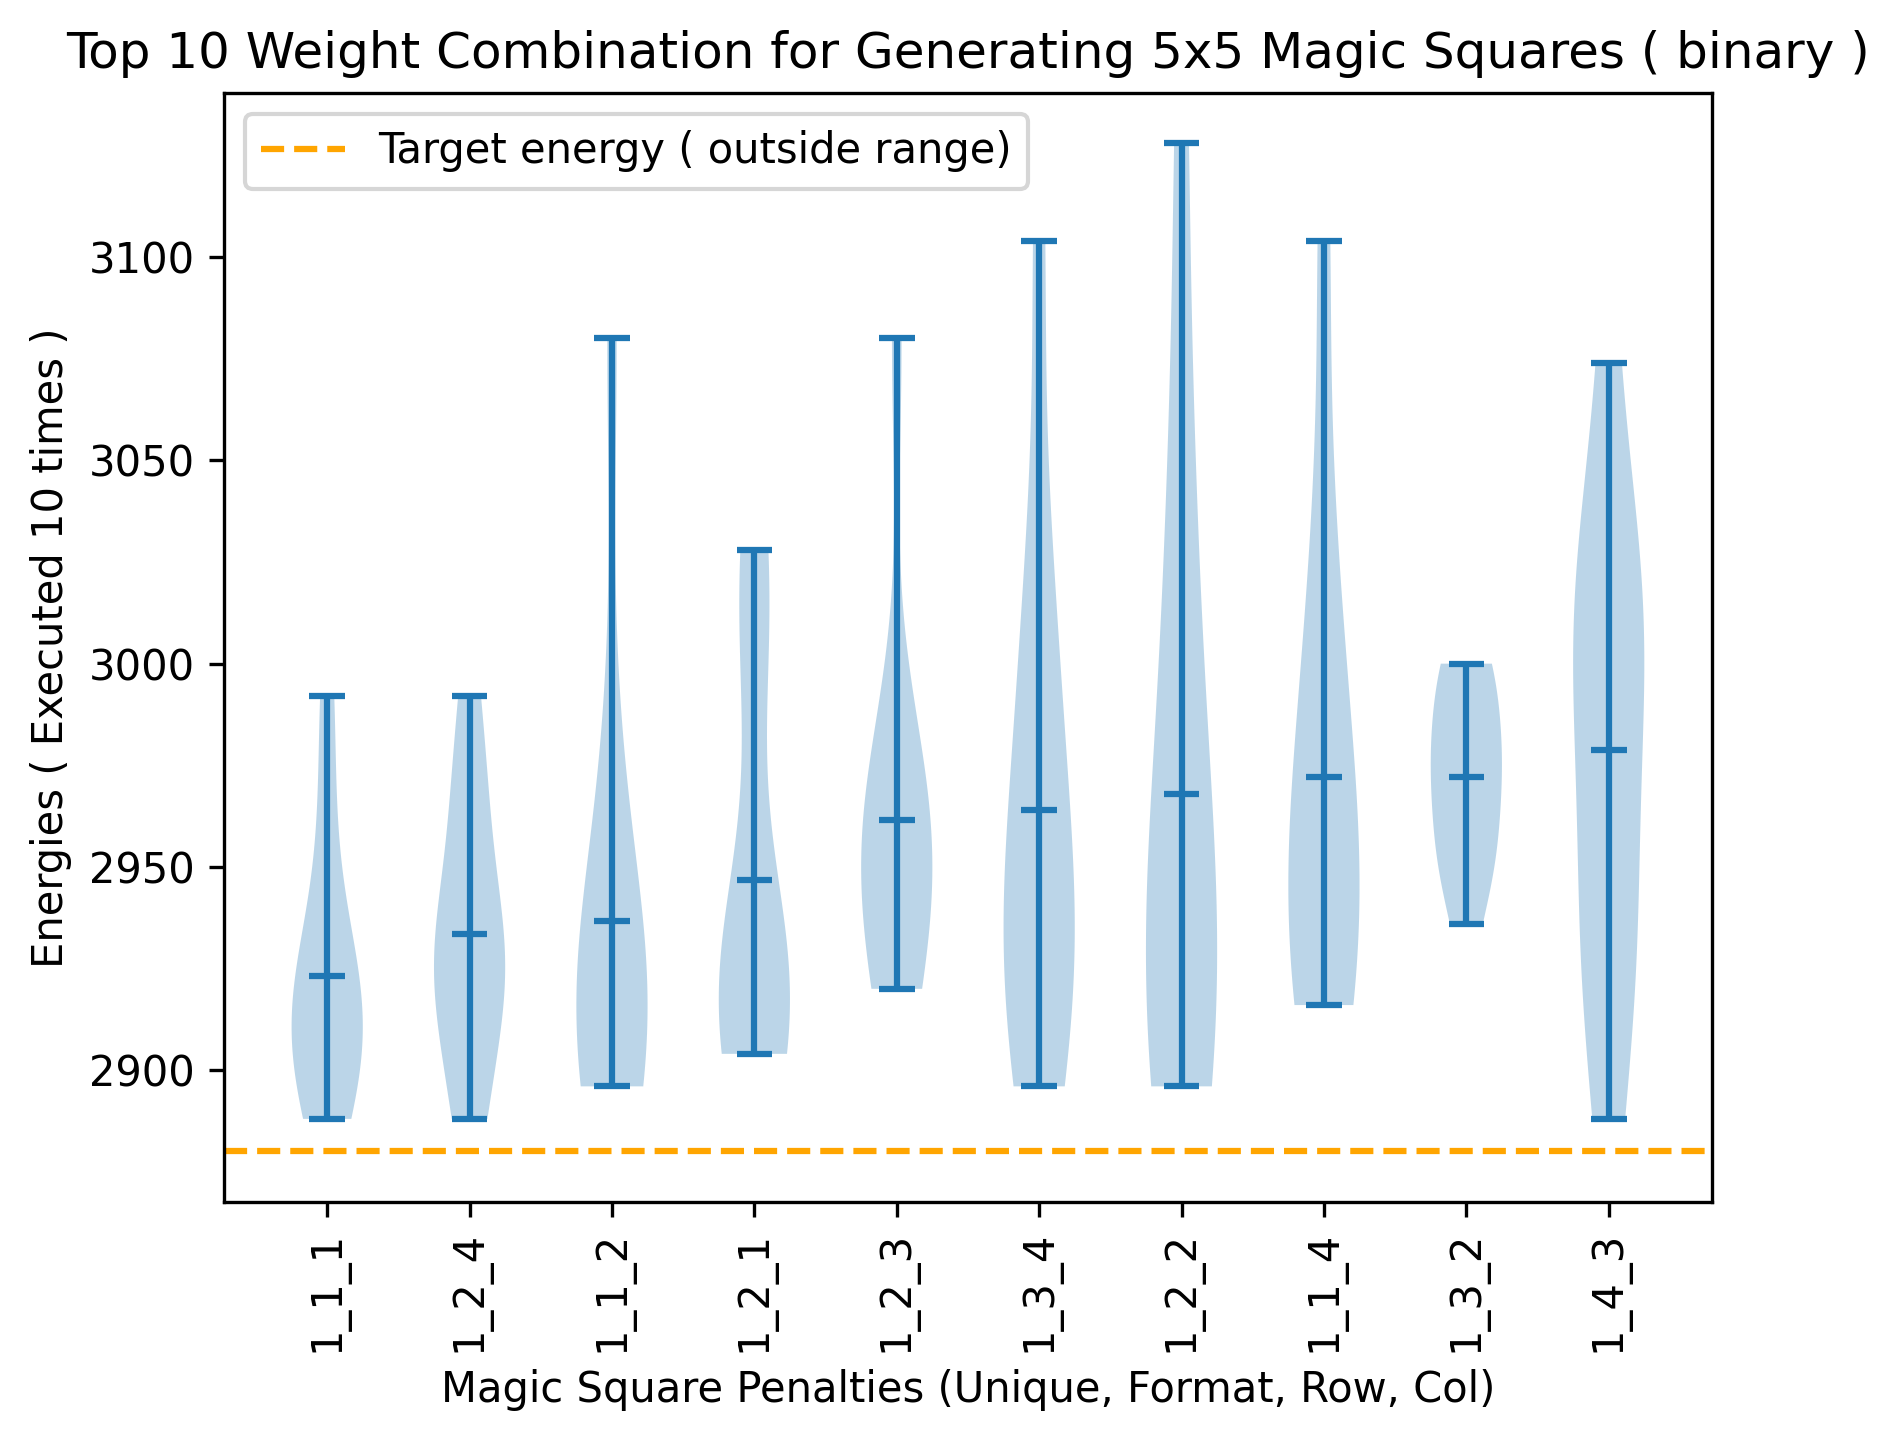

In [20]:

for order in range(5, 6):

    method = "binary"
    filename = f"solutions_{order}.npy"

    data = np.load(f"{method}/{filename}", allow_pickle=True)
    number_of_trials = data[0]["samples"]
    
    plt.figure(dpi=300)
    plt.title(f"Top 10 Weight Combination for Generating {order}x{order} Magic Squares ( {method} )")
    plt.xlabel("Magic Square Penalties (Unique, Format, Row, Col)")
    plt.ylabel(f"Energies ( Executed {number_of_trials} times )")

    # show a red dotted horizontal line at 0
    # plt.axhline(0, color='red', linestyle='--', label="Target energy ( in range )")
    plt.axhline(2880, color='orange', linestyle='--', label="Target energy ( outside range)")

    # extract the data and positions for the violin plot
    data = list(energies_sorted[method][filename].values())

    if method == "binary":
        positions = list(map(lambda x: f"{x[0]}_{x[1]}_{x[2]}", energies_sorted[method][filename].keys()))
    else:
        positions = list(map(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}", energies_sorted[method][filename].keys()))

    # create the violin plot
    plt.violinplot(data, positions=[i for i in range(10)], showmeans=True)
    plt.xticks([i for i in range(len(energies_sorted[method][filename].keys()))], positions, rotation=90)

    plt.legend()
    
    # plt.show()
    plt.savefig(f"test_{order}", bbox_inches="tight")

In [6]:
for i, size in enumerate(sizes):
    df = pd.DataFrame(energies[i], columns=["Energy"])
    df.to_csv(f"domain_wall/energies_{size}.csv", index=False)